# Problem Statement

Consider a set of n-dimensional points $P$ and two subsets $P_1 \subseteq T$ and $P_2 \subseteq T$.

Then the points in the two subsets are subjected to random jitter followed by an affine transformation. The identity or ordering of the points is not preserved, only their coordinates are known.

Find the affine transformation to map $P_1$ into $P_2$.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

Text(0.5, 1.0, 'Point sets before transformation')

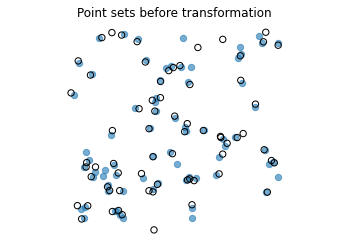

In [2]:
P = np.random.random((80, 2))
P1 = P[:72].copy()
np.random.shuffle(P)
P2 = P[:68].copy()

# jitter
P2 += np.random.randn(*P2.shape) * 1e-2

plt.scatter(*P1.T, s=40, alpha=0.6)
plt.scatter(*P2.T, s=40, facecolor='none', color='k')
plt.box(False)
plt.axis(False)
plt.axis('equal');
plt.title('Point sets before transformation')

Text(0.5, 1.0, 'Point sets afer transformation')

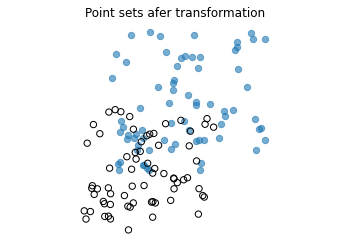

In [3]:
alpha = 0.1
rotation = [
    [np.cos(alpha), -np.sin(alpha)],
    [np.sin(alpha), np.cos(alpha)]]
scale = 0.8
P2 = P2 @ rotation * scale 
P1 += [0.2, 0.3]

plt.scatter(*P1.T, s=40, alpha=0.6)
plt.scatter(*P2.T, s=40, facecolor='none', color='k')
plt.box(False)
plt.axis(False)
plt.axis('equal');
plt.title('Point sets afer transformation')

How would you find the geometry transformation to match the two point sets: rotation, scale, and offset?

More generally, we consider the full affine transformation including shear and reflection.

We are most interested in solving the problem in 3D.

## A real-world example

We included a real-world example from a neuroscience experiment provided by Dr. Katerina Kalemaki from Dr. Stelios Smirnakis' Lab at Harvard Medical School. 

The dataset comprises two sets of 3D positions of neurons imaged in the same volume of brain tissue on two different days. They are largely overlapping but the image segmentation algorithm is not perfect. It does not find the same cells in both images. Plus we don't know the correspondence between the cells in the two datasets.

Our task is to match the cells from Day 1 to the cells in Day 2. Some cells may not match at all.

In [4]:
points1 = np.load('data/Animal1_Day1_points.npy')
points2 = np.load('data/Animal1_Day2_points.npy')

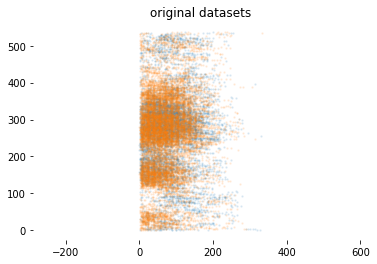

In [5]:
plt.scatter(*points1[:,:2].T, s=2, alpha=0.1)
plt.scatter(*points2[:,:2].T, s=2, alpha=0.1)
plt.axis('equal')
plt.box(False)
plt.title('original datasets');

Now we make the problem more difficult. Imagine that the experimenter is much less careful matching the imaged volumes. The two sets are rotated, scaled, and cropped differently:

In [6]:
# crop and scale datasets differently
points1 = points1[points1[:,1] < 0.6 * points1[:,1].max(), :]
points1 *= 1.2

# rotate and translate the second set
alpha = 0.1
rotation = [
    [np.cos(alpha), -np.sin(alpha), 0],
    [np.sin(alpha), np.cos(alpha), 0],
    [0, 0, 1]]
points2 = points2 @ rotation

points2 = points2[points2[:,1] < 0.7 * points2[:,1].max(), :]
points2 = points2[points2[:,0] < 0.6 * points2[:,0].max(),:]

points2 += np.array([500, -100, 30])

Text(0.5, 1.0, 'transformed datasets')

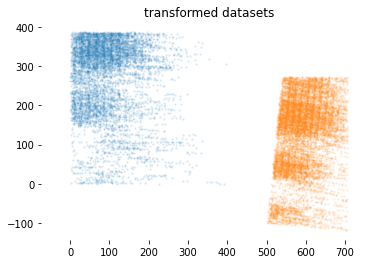

In [7]:
plt.scatter(*points1[:,:2].T, s=2, alpha=0.1)
plt.scatter(*points2[:,:2].T, s=2, alpha=0.1)
plt.axis('equal')
plt.box(False)
plt.title('transformed datasets')

Now the problem becomes a bit more diffucult and cannot be solved by image registration techniques.

## Previous approaches 

The problem of [Point Set Registration](https://en.wikipedia.org/wiki/Point-set_registration) has been addressed in several forms.
However, these problems differ in some important aspects from the problem stated above.

Solutions to this problem have been attempted previously. 

The paper [Bugeon, et al. Nature (2022)]( https://www.nature.com/articles/s41586-022-04915-7) solves a similar problem by using [NeuromicsCellDetection](https://github.com/ha-ha-ha-han/NeuromicsCellDetection), which references the following description https://ha-ha-ha-han.github.io//projects/neuro/.
The method searches exaustively through all rotation angles and uses image correlation to find the optimal translation. 
This may work with no scaling with substantial intersection between the two point sets.